# House Predictions

### Group: AC Dela Paz, Joelynn Deng, Suman Tripathy, Tinh Nguyen

In [1]:
%matplotlib inline
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas import DataFrame, Series
from sklearn.cross_validation import train_test_split

In [2]:
df = pd.read_csv('train.csv')
ts = pd.read_csv('test.csv')

A few resources:
     - (sklearn lin. models) http://scikit-learn.org/stable/modules/linear_model.html 
     - (ex. script) https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models

# Data Visualization and Exploration

## Data Clean-up
 - Deal with null values
 - Deal with linearly dependent columns/features
 - Look at PoolQC, MiscFeature
 
## Feature building/extraction
 - Parse and give numerical values to str. values. (ex. Utilities, LotShape, SaleCondition)
 

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.dtypes
#Counts missing values for each column (may want to omit these columns if they are not useful)
df.isnull().sum() 

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [5]:
# Let's construct a new feature, How big is each room?

print(df['GrLivArea'].isnull().sum())
print(df['BedroomAbvGr'].isnull().sum())
print(df['FullBath'].isnull().sum())
print(df['HalfBath'].isnull().sum())

average_room_size = (df['GrLivArea']).divide((df['TotRmsAbvGrd']))
df['AvgRoomSize'] = average_room_size

0
0
0
0


In [6]:
df['TotRmsAbvGrd'].describe()

count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64

In [7]:
house_y = df['SalePrice'] # our training "labels"
house_x = df.drop('SalePrice', axis=1).drop('Id', axis=1) # training data, without labels, id

### Dealing With Null values

Currently house_x contains all the original columns except for  (Id, Salesprice). We need to devise a plan to deal with Null values in our dataset (omit them, or give them meaning).

For example: 
 - PoolQC (Pool Quality Control), has a lot of null values but NA is the choice for 'no pool'
 - Alley (type of alley access from property), might (not?) be a useful feature for house predictions
 - MiscVal, corresponds with MiscFeature (value of the misc. feature)





In [8]:
# Let's first fix LotFrontage: Linear feet of street connected to property
df['LotFrontage'] = df['LotFrontage'].fillna(value=0)
df['PoolQC'] = df['PoolQC'].fillna(value='missing')
df['Fence'] = df['Fence'].fillna(value='missing')
df['MasVnrArea'] = df['MasVnrArea'].fillna(value=0)
df['GarageArea'] = df['GarageArea'].fillna(value=0)
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(value=0)

### Dealing with Categorical Data

To deal with categorical data, PoolQC, we can use the one-hot encoding schema.

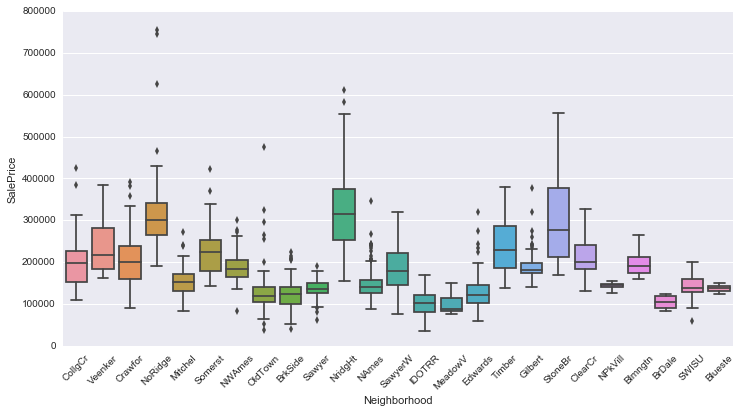

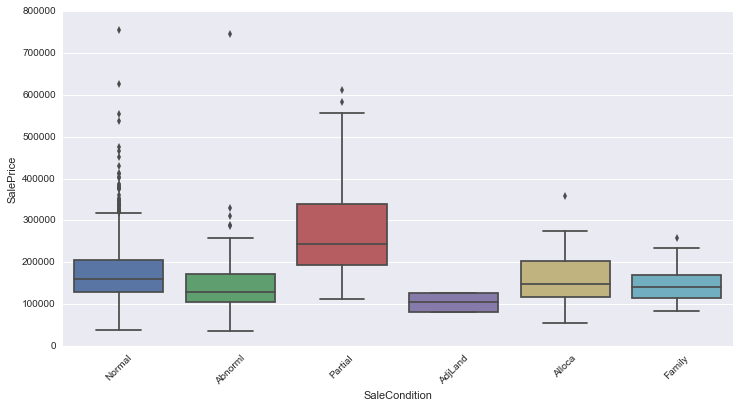

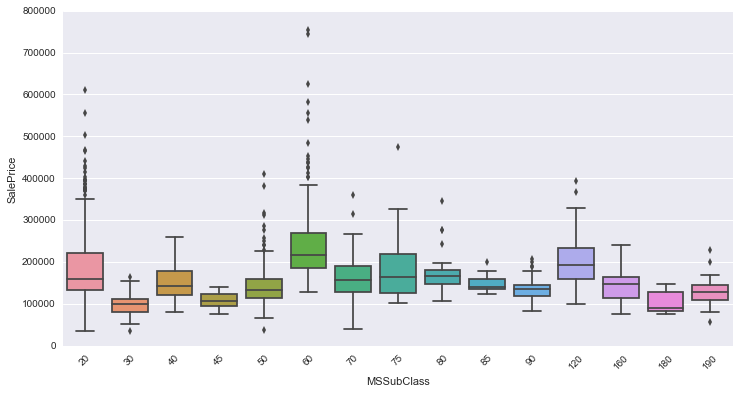

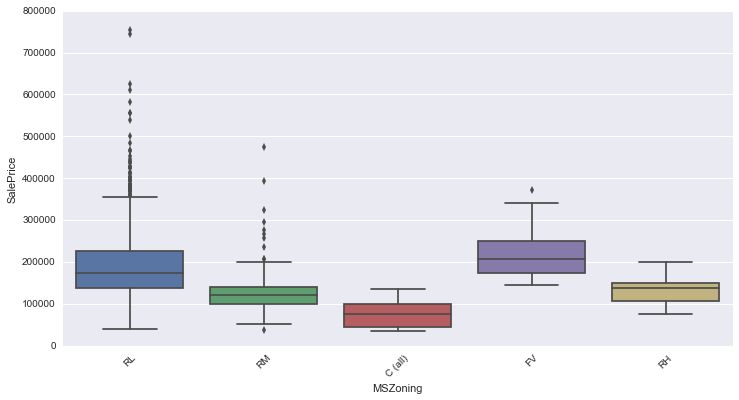

In [9]:
# Let's analyze the relationship between Neighborhood and SalePrice
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice',  data = df)
xt = plt.xticks(rotation=45)

# Box plot of certain column

plt.figure(figsize = (12, 6))
sns.boxplot(x = 'SaleCondition', y = 'SalePrice',  data = df)
xt = plt.xticks(rotation=45)


plt.figure(figsize = (12, 6))
sns.boxplot(x = 'MSSubClass', y = 'SalePrice',  data = df)
xt = plt.xticks(rotation=45)

plt.figure(figsize = (12, 6))
sns.boxplot(x = 'MSZoning', y = 'SalePrice',  data = df)
xt = plt.xticks(rotation=45)



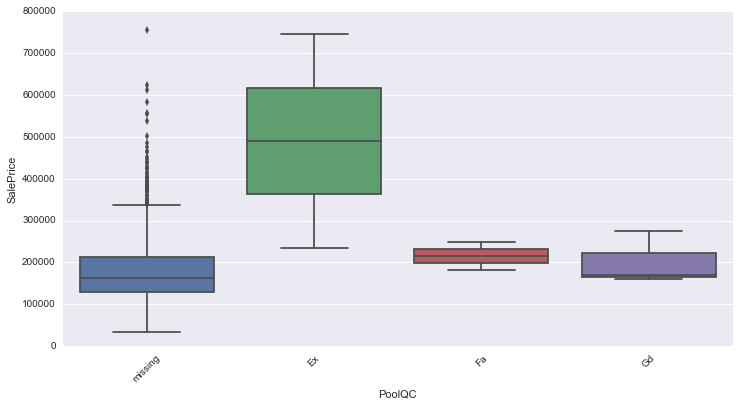

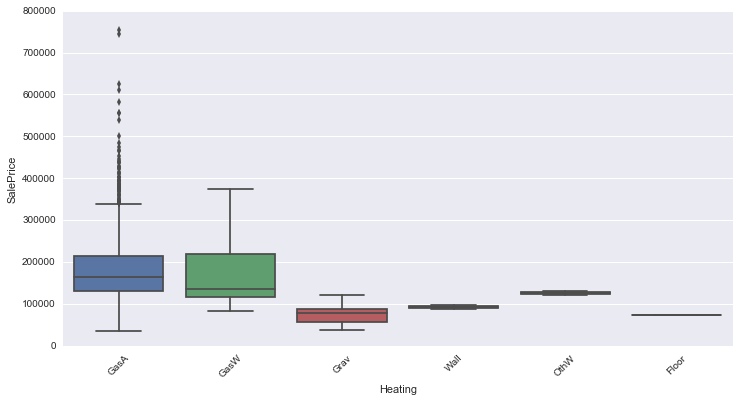

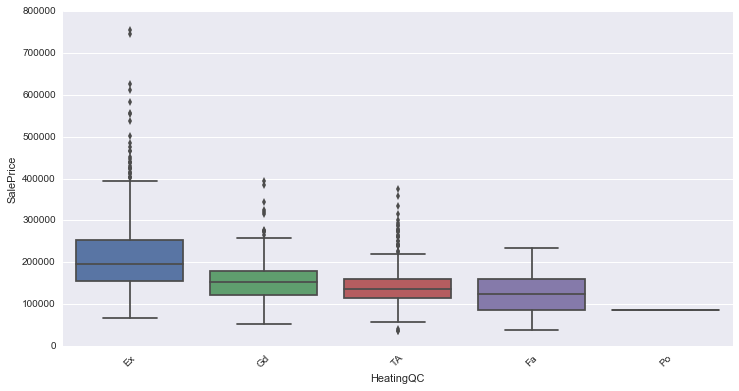

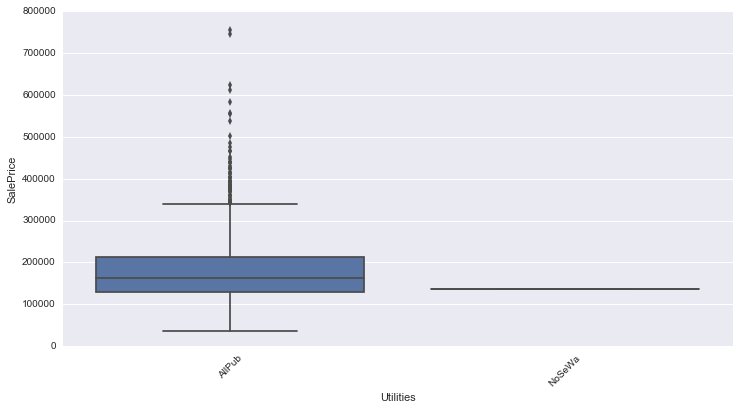

In [10]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'PoolQC', y = 'SalePrice',  data = df)
xt = plt.xticks(rotation=45)

plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Heating', y = 'SalePrice',  data = df)
xt = plt.xticks(rotation=45)

plt.figure(figsize = (12, 6))
sns.boxplot(x = 'HeatingQC', y = 'SalePrice',  data = df)
xt = plt.xticks(rotation=45)

plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Utilities', y = 'SalePrice',  data = df)
xt = plt.xticks(rotation=45)

From the looks of our box plots. MSZoning tells us that Floating Village Residential(FV) and Residential Low Density housing is generally more expensive. Thus, we'll decide to add this feature and hopefully it'll tell us something about sales price.

The HeatingQC also seems to be a large factor in sales price. Excellent heating quality generally obtains the highest sales price.

In [11]:
df['Utilities'].describe()

count       1460
unique         2
top       AllPub
freq        1459
Name: Utilities, dtype: object

In [12]:
df.groupby('Fence')['SalePrice'].describe()

Fence         
GdPrv    count        59.000000
         mean     178927.457627
         std       56757.237563
         min      108000.000000
         25%      144950.000000
         50%      167500.000000
         75%      189475.000000
         max      475000.000000
GdWo     count        54.000000
         mean     140379.314815
         std       53592.585059
         min       34900.000000
         25%      118625.000000
         50%      138750.000000
         75%      151750.000000
         max      381000.000000
MnPrv    count       157.000000
         mean     148751.089172
         std       66096.069463
         min       40000.000000
         25%      119900.000000
         50%      137450.000000
         75%      158000.000000
         max      745000.000000
MnWw     count        11.000000
         mean     134286.363636
         std       21781.805376
         min      110000.000000
         25%      121500.000000
         50%      130000.000000
         75%      143000.

In [13]:
## Looks like fences don't make a difference. Let's try has fence
noFence = df['Fence'] == 'missing'
df['NoFence'] = noFence
df.head()
#temp_with_no_Fence.groupby('noFence')
df.groupby('NoFence')['SalePrice'].describe()

NoFence       
False    count       281.000000
         mean     152912.007117
         std       62113.736323
         min       34900.000000
         25%      123000.000000
         50%      141500.000000
         75%      166000.000000
         max      745000.000000
True     count      1179.000000
         mean     187596.837998
         std       81656.497075
         min       35311.000000
         25%      132750.000000
         50%      173000.000000
         75%      224700.000000
         max      755000.000000
Name: SalePrice, dtype: float64

From this, we can see that there isn't much of a difference if you have a fence or not. 

In [14]:
#house_x = pd.get_dummies(house_x,columns=['PoolQC'],drop_first=True)
house = pd.get_dummies(df, columns=['PoolQC', 'Neighborhood', 'MSZoning', 'HeatingQC', 'ExterQual'], drop_first=True)
house.columns.values

array(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch'

Median salePrice:  163000.0


(array([  22.,  126.,  380.,  343.,  229.,  144.,   86.,   49.,   28.,
          23.,   12.,    7.,    3.,    1.,    2.,    1.,    2.,    0.,
           0.,    2.]),
 array([  34900.,   70905.,  106910.,  142915.,  178920.,  214925.,
         250930.,  286935.,  322940.,  358945.,  394950.,  430955.,
         466960.,  502965.,  538970.,  574975.,  610980.,  646985.,
         682990.,  718995.,  755000.]),
 <a list of 20 Patch objects>)

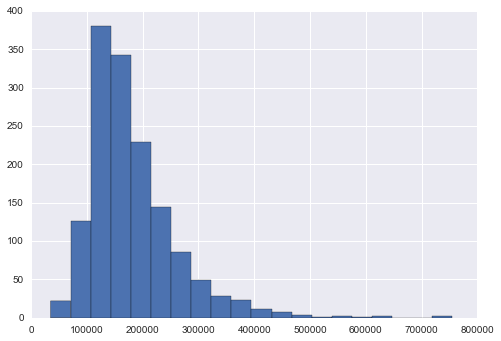

In [15]:

print('Median salePrice: ', house['SalePrice'].median(axis=0))
plt.hist(house['SalePrice'], bins=20)


In [16]:
# grabs all the desired neighborhoods
def obtainDesiredColumns(df):
    neighborhood_pattern = '(Neighborhood_.*)'
    ms_pattern = '(MSZoning_.*)'
    pqc_pattern = '(PoolQC_.*)'
    heatingqc_pattern = '(HeatingQC_.*)'

    desired_columns = []
    for col_name in df.columns.values:
        if re.match(neighborhood_pattern, col_name):
            desired_columns.append(col_name)
        elif re.match(ms_pattern, col_name):
            desired_columns.append(col_name)
        elif re.match(pqc_pattern, col_name):
            desired_columns.append(col_name)
        elif re.match(heatingqc_pattern, col_name):
            desired_columns.append(col_name)
    desired_columns += ["OverallQual", 
                            "GrLivArea", 
                            "GarageArea", 
                            "1stFlrSF", 
                            "TotalBsmtSF", 
                            "TotRmsAbvGrd",
                           "FullBath",
                           "LotArea",
                           "WoodDeckSF",
                           "OpenPorchSF",
                            "Fireplaces",
                           "LotFrontage",
                           "MasVnrArea",
                           "YearRemodAdd",
                           "AvgRoomSize"]
    return desired_columns
desired_columns = obtainDesiredColumns(house)

In [17]:
len(desired_columns)

50

In [18]:
'AvgRoomSize' in house.columns.values

True

### Analyzing multi-collinearity, feature building/analysis.

After dealing with Null values, we should take a look at the features and try to analyze their dependence. 

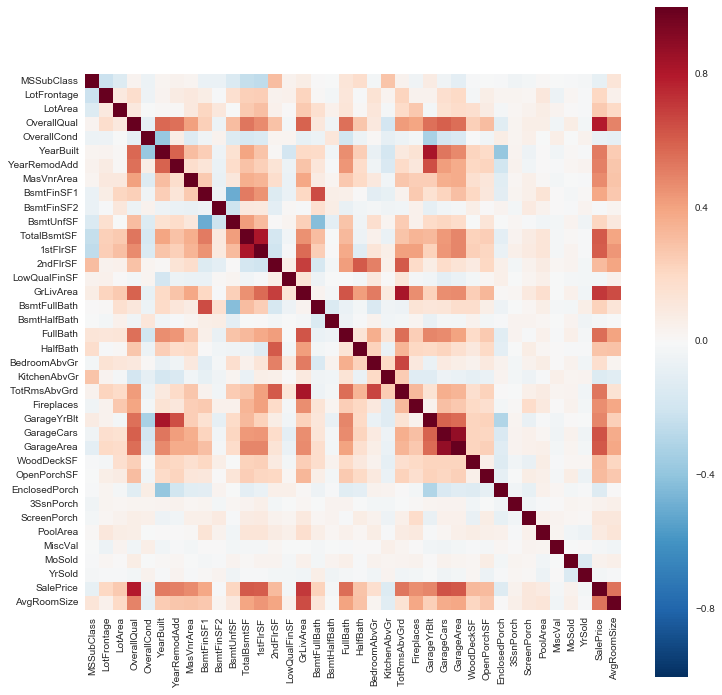

In [19]:
### Numerical Feature Heat Map 
# taken from https://www.kaggle.com/xchmiao/house-prices-advanced-regression-techniques/detailed-data-exploration-in-python

corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)

# From this heat map, we can view multicollinearity easier. 
# Darker values suggest the two features may be linear dependent.
# Ex. Garage-Cars & Garage-Area

## Desired Features

## Model Building/Evaluation

In [20]:
local_train, local_test = train_test_split(house,test_size=0.2,random_state=123)

In [21]:
# Training a linear classifier (only on one)
clf = sm.OLS(local_train["SalePrice"], local_train['OverallQual'])
results = clf.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 1.496e+04
Date:                Sat, 01 Oct 2016   Prob (F-statistic):               0.00
Time:                        17:47:41   Log-Likelihood:                -14365.
No. Observations:                1168   AIC:                         2.873e+04
Df Residuals:                    1167   BIC:                         2.874e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
OverallQual  3.042e+04    248.677    122.327      0.000      2.99e+04  3.09e+04
==============================================================================
Omnibus:                      665.177   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8742.142
Skew:                           2.361   Prob(JB):                         0.00
Kurtosis:                      15.543   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# Training a linear classifier (only on numerical values)
house.columns.values

array(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch'

In [23]:
# Running a model on a few categorical data columns (PoolQC, MSSubClass, Neighborhood)

local_train, local_test = train_test_split(house,test_size=0.2,random_state=123)

local_train_y = local_train["SalePrice"]
local_train_x = local_train.drop(["SalePrice"],axis=1)
local_train_x = local_train_x[desired_columns]

local_test_y = local_test["SalePrice"]
local_test_x = local_test.drop("SalePrice",axis=1)
local_test_x = local_test_x[desired_columns]

In [24]:
clf = sm.OLS(local_train_y, local_train_x)
result = clf.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     771.9
Date:                Sat, 01 Oct 2016   Prob (F-statistic):               0.00
Time:                        17:47:41   Log-Likelihood:                -13814.
No. Observations:                1168   AIC:                         2.773e+04
Df Residuals:                    1118   BIC:                         2.798e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
PoolQC_Fa            -1.413e+05   3.54e+04     -3.993      0.000     -2.11e+05 -7.19e+04
PoolQC_Gd             -2.64e+05   3.18e+04     -8.308      0.000     -3.26e+05 -2.02e+05
PoolQC_missing       -1.526e+05   2.54e+04     -6.001      0.000     -2.02e+05 -1.03e+05
Neighborhood_Blueste -1.242e+04   3.57e+04     -0.348      0.728     -8.25e+04  5.77e+04
Neighborhood_BrDale  -1.875e+04   1.43e+04     -1.308      0.191     -4.69e+04  9372.535
Neighborhood_BrkSide   834.5099   1.14e+04      0.073      0.942     -2.15e+04  2.32e+04
Neighborhood_ClearCr  1.102e+04   1.25e+04      0.882      0.378     -1.35e+04  3.55e+04
Neighborhood_CollgCr  8620.8749   1.01e+04      0.852      0.394     -1.12e+04  2.85e+04
Neighborhood_Crawfor  2.394e+04   1.11e+04      2.153      0.032      2121.991  4.58e+04
Neighborhood_Edwards -1.027e+04   1.07e+04     -0.959      0.338     -3.13e+04  1.07e+04
Neighborhood_Gilbert  6268.9828   1.07e+04      0.585      0.559     -1.48e+04  2.73e+04
Neighborhood_IDOTRR  -5013.2609   1.31e+04     -0.384      0.701     -3.07e+04  2.06e+04
Neighborhood_MeadowV -4835.0450   1.39e+04     -0.347      0.728     -3.22e+04  2.25e+04
Neighborhood_Mitchel   -18.5143   1.12e+04     -0.002      0.999     -2.19e+04  2.19e+04
Neighborhood_NAmes   -8157.3132   1.02e+04     -0.801      0.423     -2.81e+04  1.18e+04
Neighborhood_NPkVill -9365.8537   1.56e+04     -0.601      0.548     -3.99e+04  2.12e+04
Neighborhood_NWAmes  -7138.9182   1.07e+04     -0.666      0.505     -2.82e+04  1.39e+04
Neighborhood_NoRidge  5.547e+04   1.18e+04      4.721      0.000      3.24e+04  7.85e+04
Neighborhood_NridgHt  6.344e+04   1.09e+04      5.833      0.000      4.21e+04  8.48e+04
Neighborhood_OldTown -1.478e+04   1.13e+04     -1.306      0.192      -3.7e+04  7422.946
Neighborhood_SWISU   -1.712e+04   1.23e+04     -1.388      0.166     -4.13e+04  7086.421
Neighborhood_Sawyer  -8500.0326   1.08e+04     -0.785      0.433     -2.97e+04  1.27e+04
Neighborhood_SawyerW  2943.5842   1.08e+04      0.273      0.785     -1.82e+04  2.41e+04
Neighborhood_Somerst  2.084e+04   1.25e+04      1.668      0.096     -3669.283  4.53e+04
Neighborhood_StoneBr  6.352e+04   1.21e+04      5.262      0.000      3.98e+04  8.72e+04
Neighborhood_Timber   1.686e+04   1.14e+04      1.478      0.140     -5524.364  3.92e+04
Neighborhood_Veenker  3.468e+04   1.41e+04      2.460      0.014      7023.245  6.23e+04
MSZoning_FV           2.508e+04   1.64e+04      1.528      0.127     -7128.048  5.73e+04
MSZoning_RH           1.658e+04   1.64e+04      1.012      0.312     -1.56e+04  4.87e+04
MSZoning_RL           2.862e+04   1.34e+04      2.136      0.033      2330.978  5.49e+04
MSZoning_RM           2.061e+04   1.26e+04      1.641      0.101     -4028.907  4.52e+04
HeatingQC_Fa          -1.06e+04   5931.049     -1.787    

In [25]:
preds = result.predict(local_train_x)

n = local_train_y.shape[0]
np.sqrt((1/n)*np.sum((np.log(local_train_y) - np.log(preds))**2))

0.18813180065412299

In [26]:
test_preds = result.predict(local_test_x)
n = local_test_y.shape[0]
np.sqrt((1/n)*np.sum((np.log(local_test_y) - np.log(test_preds))**2))

0.1476114819194034

In [27]:
average_room_size = (ts['GrLivArea']).divide((df['TotRmsAbvGrd']))
ts['AvgRoomSize'] = average_room_size

ts['LotFrontage'] = ts['LotFrontage'].fillna(value=0)
ts['PoolQC'] = ts['PoolQC'].fillna(value='missing')
ts['Fence'] = ts['Fence'].fillna(value='missing')
ts['MasVnrArea'] = ts['MasVnrArea'].fillna(value=0)
ts['GarageArea'] = ts['GarageArea'].fillna(value=0)
ts['TotalBsmtSF'] = ts['TotalBsmtSF'].fillna(value=0)



testHouse = pd.get_dummies(ts, columns=['PoolQC', 'Neighborhood', 'MSZoning', 'HeatingQC', 'ExterQual'], drop_first=True)
desired = obtainDesiredColumns(testHouse)

## Since there may be missing values, add dummy variables (col of 0's)
missing_vals = [col for col in desired_columns if col not in desired]
for m in missing_vals:
    testHouse[m] = 0

In [28]:
testHouse[desired_columns].isnull().sum()

PoolQC_Fa               0
PoolQC_Gd               0
PoolQC_missing          0
Neighborhood_Blueste    0
Neighborhood_BrDale     0
Neighborhood_BrkSide    0
Neighborhood_ClearCr    0
Neighborhood_CollgCr    0
Neighborhood_Crawfor    0
Neighborhood_Edwards    0
Neighborhood_Gilbert    0
Neighborhood_IDOTRR     0
Neighborhood_MeadowV    0
Neighborhood_Mitchel    0
Neighborhood_NAmes      0
Neighborhood_NPkVill    0
Neighborhood_NWAmes     0
Neighborhood_NoRidge    0
Neighborhood_NridgHt    0
Neighborhood_OldTown    0
Neighborhood_SWISU      0
Neighborhood_Sawyer     0
Neighborhood_SawyerW    0
Neighborhood_Somerst    0
Neighborhood_StoneBr    0
Neighborhood_Timber     0
Neighborhood_Veenker    0
MSZoning_FV             0
MSZoning_RH             0
MSZoning_RL             0
MSZoning_RM             0
HeatingQC_Fa            0
HeatingQC_Gd            0
HeatingQC_Po            0
HeatingQC_TA            0
OverallQual             0
GrLivArea               0
GarageArea              0
1stFlrSF    

In [29]:
missing_vals

['PoolQC_Fa']

In [30]:
testSet_preds = result.predict(testHouse[desired_columns])


In [31]:
import csv
with open('predictions.csv', 'w') as csvfile:
        w = csv.writer(csvfile, delimiter=',', quoting=csv.QUOTE_MINIMAL)
        w.writerow(['Id', 'SalePrice'])
        for i in range(0, len(testSet_preds)):
            w.writerow([testHouse['Id'][i], testSet_preds[i]])


In [32]:
test = df.copy()
house = pd.get_dummies(df, columns=['PoolQC', 'Neighborhood', 'MSZoning', 'HeatingQC', 'ExterQual'], drop_first=False)